# Datapreprocessing and EDA

In [2]:
import pandas as pd

def load_data(filepath):
    """
    Loads the asthma dataset


    """
    return pd.read_csv(filepath)

# Load your dataset
file_path = "asthma_disease_data.csv"
asthma_df = load_data(file_path)
asthma_df.head()


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid


In [3]:
asthma_df.drop(columns=["PatientID"], inplace=True)


In [4]:
def check_missing_values(df):
    """
    Checks and displays the count of missing values in each column of the dataset.


    """
    return df.isnull().sum()

# Display missing values
check_missing_values(asthma_df)


,0
Age,0
Gender,0
Ethnicity,0
EducationLevel,0
BMI,0
Smoking,0
PhysicalActivity,0
DietQuality,0
SleepQuality,0
PollutionExposure,0


In [5]:
def summarize_data(df):
    """
    Provides summary statistics and data type information of the dataset.


    """
    print("\n--- Dataset Info ---")
    print(df.info())

    print("\n--- Descriptive Statistics ---")
    print(df.describe())

# Run summary
summarize_data(asthma_df)



--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     2392 non-null   int64  
 1   Gender                  2392 non-null   int64  
 2   Ethnicity               2392 non-null   int64  
 3   EducationLevel          2392 non-null   int64  
 4   BMI                     2392 non-null   float64
 5   Smoking                 2392 non-null   int64  
 6   PhysicalActivity        2392 non-null   float64
 7   DietQuality             2392 non-null   float64
 8   SleepQuality            2392 non-null   float64
 9   PollutionExposure       2392 non-null   float64
 10  PollenExposure          2392 non-null   float64
 11  DustExposure            2392 non-null   float64
 12  PetAllergy              2392 non-null   int64  
 13  FamilyHistoryAsthma     2392 non-null   int64  
 14  HistoryOfAllergies

In [6]:
def encode_categorical_columns(df):
    """
    Encodes categorical string columns using one-hot encoding or label encoding as appropriate.


    """
    df_encoded = df.copy()

    # Encode Gender and Smoking if needed
    if df_encoded['Gender'].dtype == 'object':
        df_encoded['Gender'] = df_encoded['Gender'].astype('category').cat.codes
    if df_encoded['Smoking'].dtype == 'object':
        df_encoded['Smoking'] = df_encoded['Smoking'].astype('category').cat.codes

    # One-hot encode 'DoctorInCharge'
    if df_encoded['DoctorInCharge'].nunique() < 10:
        df_encoded = pd.get_dummies(df_encoded, columns=['DoctorInCharge'], drop_first=True)

    return df_encoded

# Encode and store new dataframe
asthma_encoded = encode_categorical_columns(asthma_df)
asthma_encoded.head()


,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
0,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,7.388481,...,0,1.369051,4.941206,0,0,1,0,0,1,0
1,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,1.969838,...,0,2.197767,1.702393,1,0,0,1,1,1,0
2,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,1.460593,...,0,1.698011,5.022553,1,1,1,0,1,1,0
3,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,0.581905,...,0,3.032037,2.300159,1,0,1,1,1,0,0
4,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,0.980875,...,0,3.470589,3.067944,1,1,1,0,0,1,0


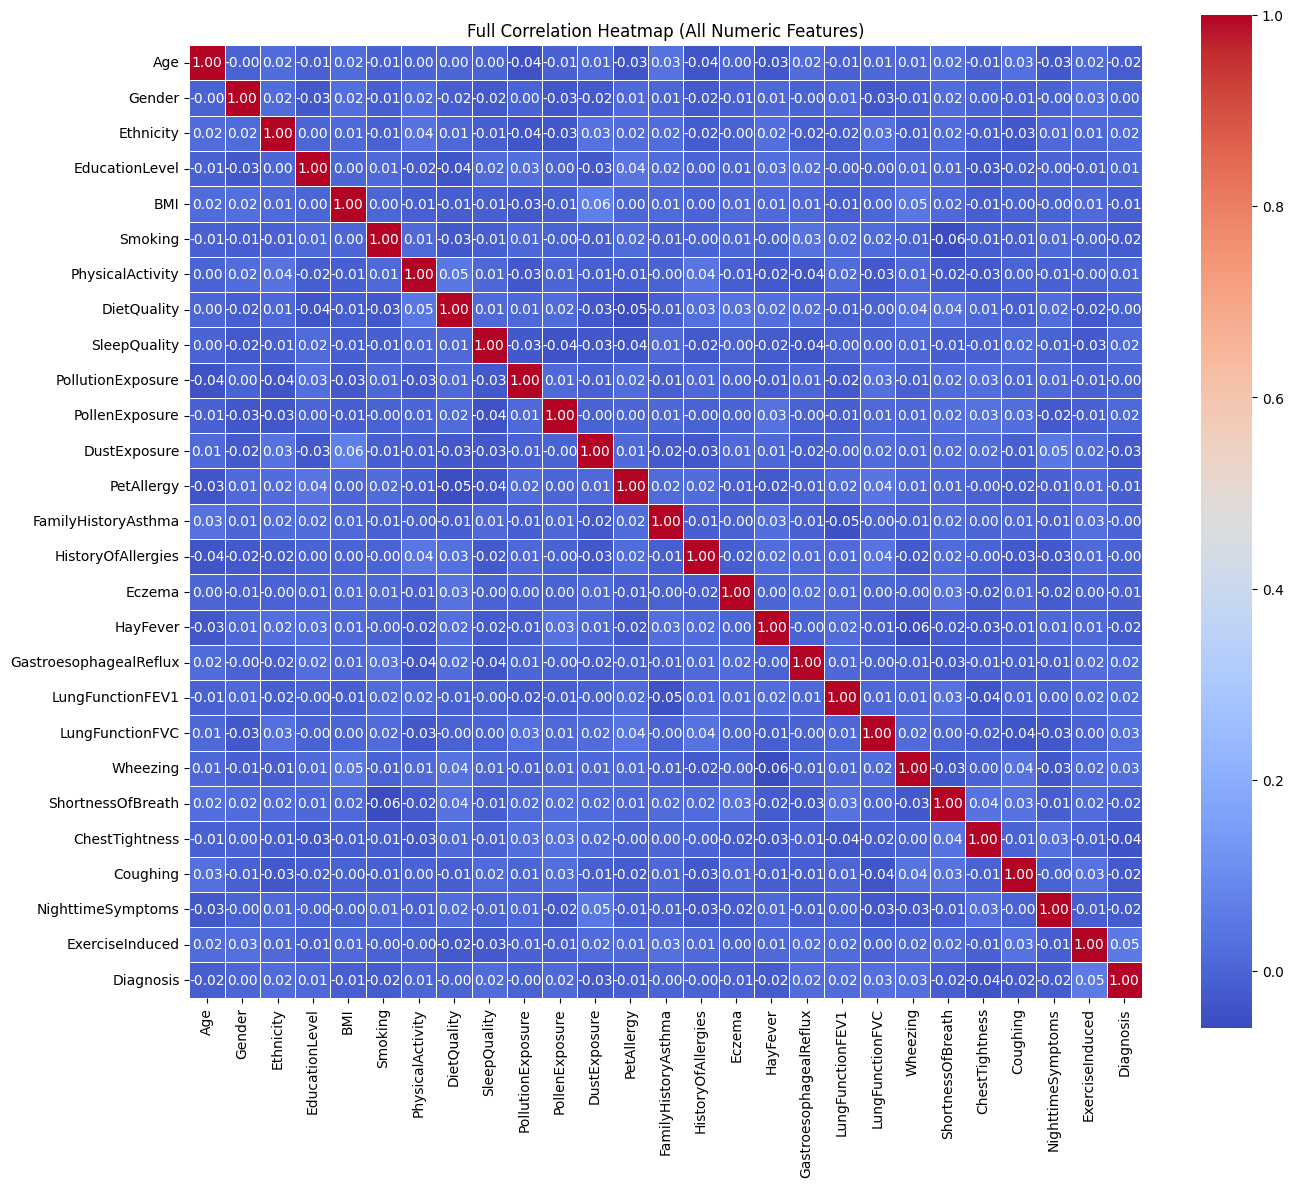

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_correlation_matrix(df):
    """
    Plots a full correlation heatmap using all numeric features, excluding identifiers.
    """
    numeric_cols = df.select_dtypes(include=['float64', 'int64'])

    # Plot the full correlation matrix
    plt.figure(figsize=(14, 12))
    sns.heatmap(numeric_cols.corr(), annot=True, fmt=".2f", cmap='coolwarm',
                linewidths=0.5, square=True, cbar=True)
    plt.title("Full Correlation Heatmap (All Numeric Features)")
    plt.tight_layout()
    plt.show()
plot_correlation_matrix(asthma_df)


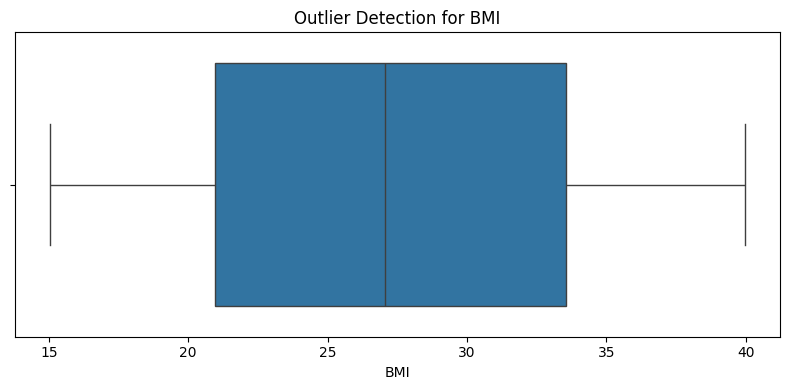

Outliers found in 'BMI': 0


In [9]:
def detect_outliers(df, column):
    """
    Detects outliers in a given column using the IQR method and plots the distribution.


    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)]

    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Outlier Detection for {column}')
    plt.tight_layout()
    plt.show()

    return outliers.index.tolist()

# Example outlier detection for BMI
outlier_indices = detect_outliers(asthma_encoded, "BMI")
print(f"Outliers found in 'BMI': {len(outlier_indices)}")


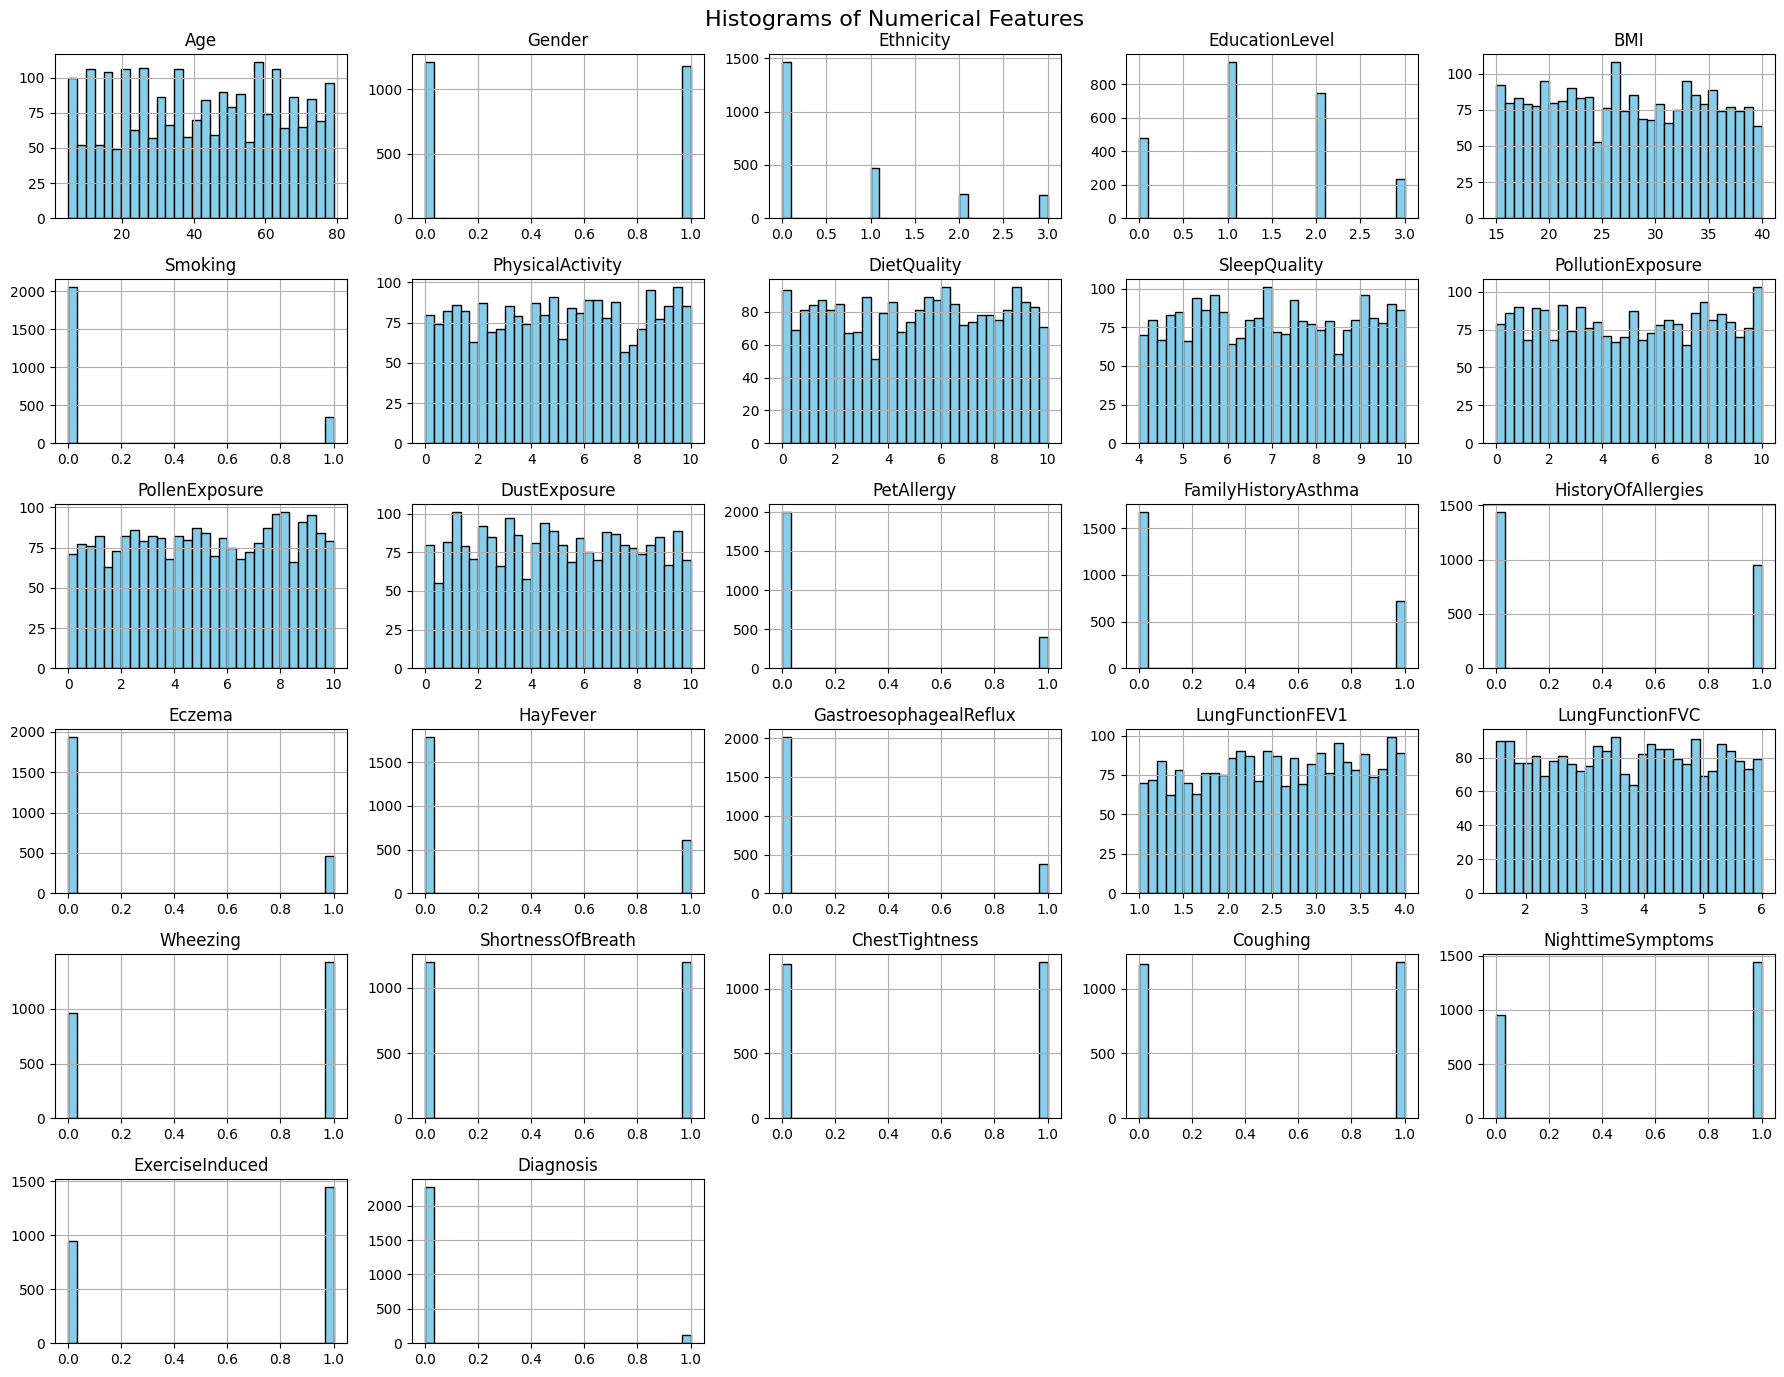

In [10]:
# Plot histograms for all numeric features
asthma_df.hist(bins=30, figsize=(18, 14), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()


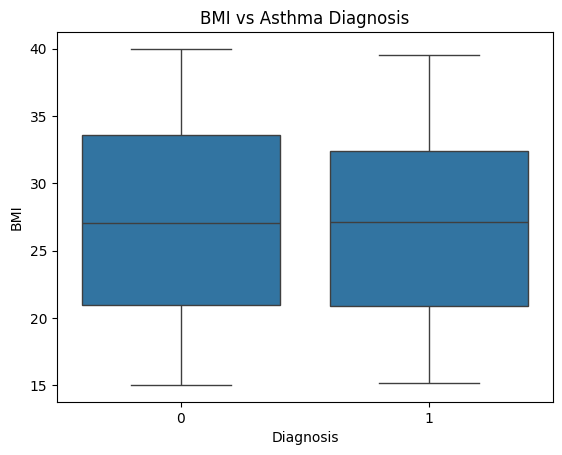

In [11]:
# Example: Boxplot of BMI vs Diagnosis
sns.boxplot(x="Diagnosis", y="BMI", data=asthma_df)
plt.title("BMI vs Asthma Diagnosis")
plt.xlabel("Diagnosis")
plt.ylabel("BMI")
plt.show()


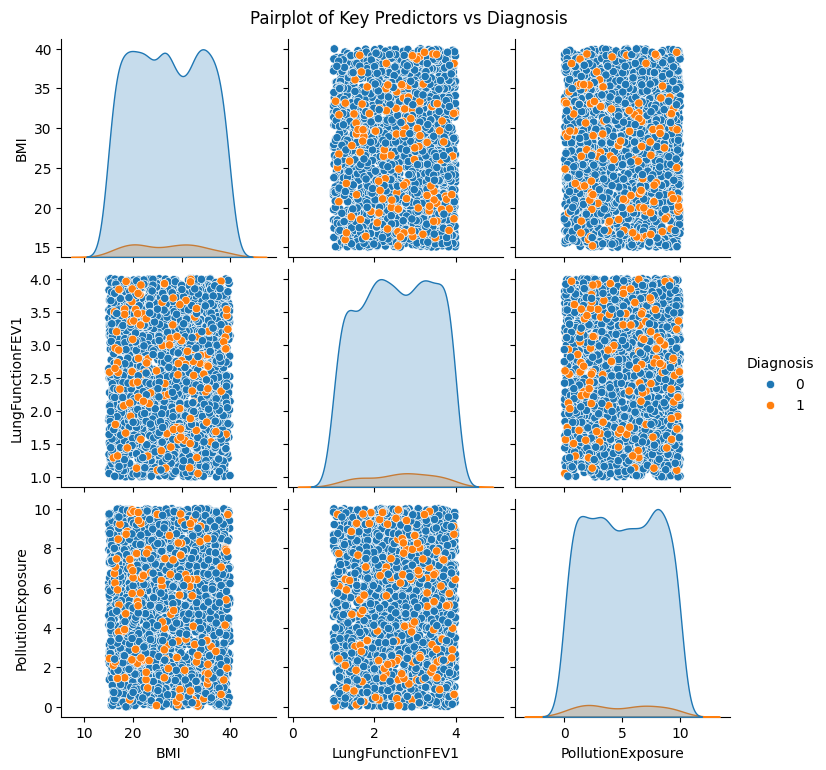

In [12]:
# If needed: visualize pairwise relationships among top features
top_features = ['BMI', 'LungFunctionFEV1', 'PollutionExposure', 'Diagnosis']
sns.pairplot(asthma_encoded[top_features], hue="Diagnosis")
plt.suptitle("Pairplot of Key Predictors vs Diagnosis", y=1.02)
plt.show()


# model training and feature selection

In [55]:
# Recreate feature and target variables (if needed)
X = asthma_encoded.drop(columns=["Diagnosis"])
y = asthma_encoded["Diagnosis"]

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,stratify = y, test_size=0.3,  shuffle=True, random_state = 42
)


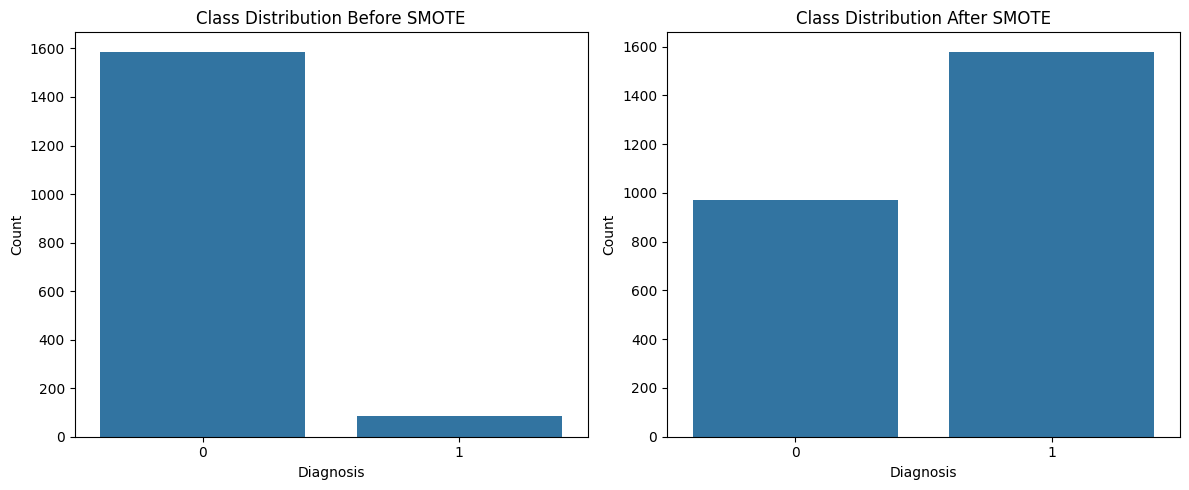

In [56]:
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_train_bal, y_train_bal = smote_enn.fit_resample(X_train, y_train)



# Plot class distribution before and after SMOTE
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Before SMOTE
sns.countplot(x=y_train, ax=axes[0])
axes[0].set_title("Class Distribution Before SMOTE")
axes[0].set_xlabel("Diagnosis")
axes[0].set_ylabel("Count")

# After SMOTE
sns.countplot(x=y_train_bal, ax=axes[1])
axes[1].set_title("Class Distribution After SMOTE")
axes[1].set_xlabel("Diagnosis")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:53:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5073 - loss: 1.3034 - val_accuracy: 0.2078 - val_loss: 0.7479
Epoch 2/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5052 - loss: 0.7840 - val_accuracy: 0.0784 - val_loss: 0.8447
Epoch 3/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5158 - loss: 0.7385 - val_accuracy: 0.0098 - val_loss: 0.8677
Epoch 4/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5139 - loss: 0.7196 - val_accuracy: 0.0804 - val_loss: 0.8651
Epoch 5/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5337 - loss: 0.6991 - val_accuracy: 0.1314 - val_loss: 0.8117
Epoch 6/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5329 - loss: 0.7106 - val_accuracy: 0.2882 - val_loss: 0.7071
Epoch 7/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5330 - loss: 0.6820 - val_accuracy: 0.7510 - val_loss: 0.6335
Epoch 8/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5887 - loss: 0.6497 - val_accuracy: 0.4961 - val_loss: 0.6869
Epo

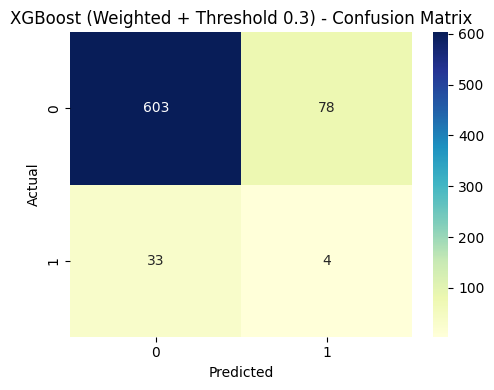


SVM (Weighted + Threshold 0.3) Classification Report:
F1 Score: 0.0972
Recall  : 0.3784


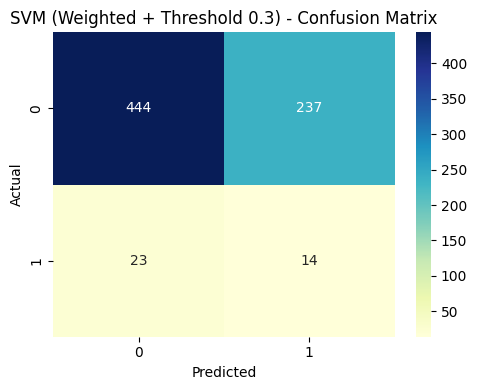


ANN (Weighted + Threshold 0.3) Classification Report:
F1 Score: 0.1102
Recall  : 0.1892


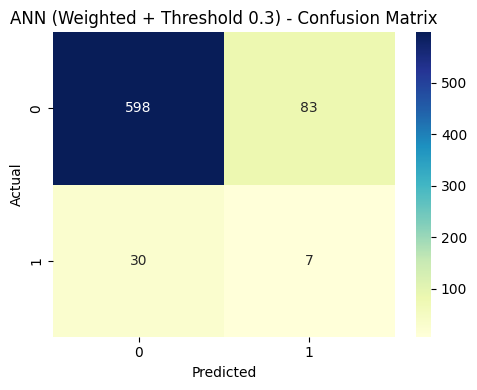

<Figure size 800x600 with 0 Axes>

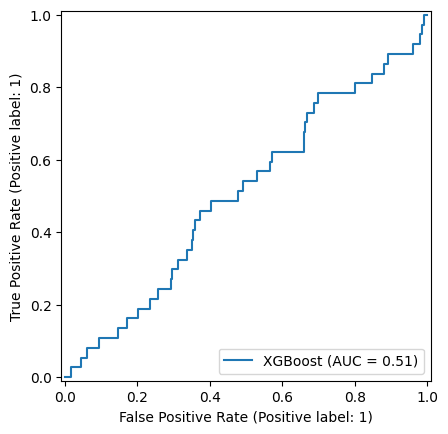

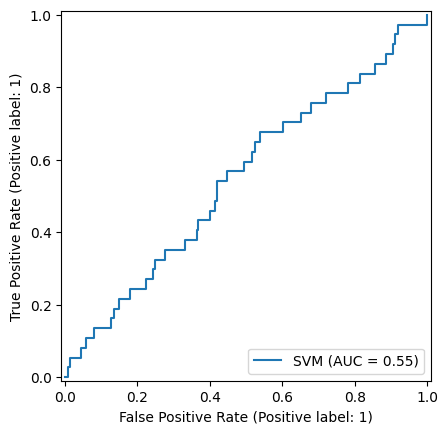

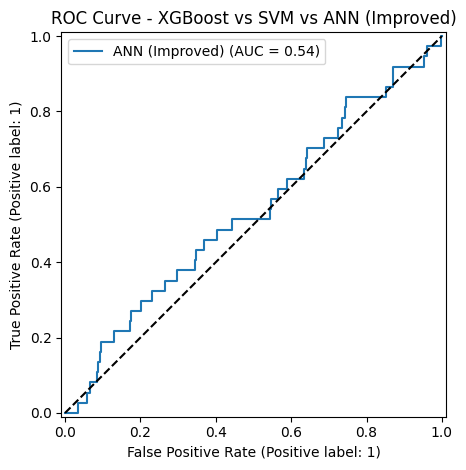

In [57]:
# === Imports ===
from xgboost import XGBClassifier
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# === MODEL 1: XGBoost with class weighting ===
scale_pos_weight = len(y_train_bal[y_train_bal == 0]) / len(y_train_bal[y_train_bal == 1])
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=scale_pos_weight)
model_xgb.fit(X_train_bal, y_train_bal)
y_proba_xgb = model_xgb.predict_proba(X_test)[:, 1]
y_pred_xgb = (y_proba_xgb >= 0.3).astype(int)  # Threshold tuning

# === MODEL 2: SVM with class weighting ===
model_svm =  SVC(kernel='linear', class_weight='balanced', probability=True)

model_svm.fit(X_train_bal, y_train_bal)
y_proba_svm = model_svm.predict_proba(X_test)[:, 1]
y_pred_svm = (y_proba_svm >= 0.3).astype(int)  # Threshold tuning

# === MODEL 3: Improved ANN with class weighting ===
# Compute class weights
cw = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_bal), y=y_train_bal)
cw_dict = dict(enumerate(cw))

model_ann = Sequential([
    Dense(128, input_dim=X_train_bal.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train with class weights
history = model_ann.fit(
    X_train_bal, y_train_bal,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1,
    class_weight=cw_dict
)

# ANN predictions
y_proba_ann = model_ann.predict(X_test).flatten()
y_pred_ann = (y_proba_ann >= 0.3).astype(int)  # Threshold tuning

# === Evaluation Function ===
def evaluate_model(name, y_test, y_pred, y_proba):
    print(f"\n{name} Classification Report:")
    report = classification_report(y_test, y_pred, output_dict=True)
    f1 = report['1']['f1-score']
    recall = report['1']['recall']
    print(f"F1 Score: {f1:.4f}")
    print(f"Recall  : {recall:.4f}")

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=[0, 1], yticklabels=[0, 1])
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# === Evaluate All Models ===
evaluate_model("XGBoost (Weighted + Threshold 0.3)", y_test, y_pred_xgb, y_proba_xgb)
evaluate_model("SVM (Weighted + Threshold 0.3)", y_test, y_pred_svm, y_proba_svm)
evaluate_model("ANN (Weighted + Threshold 0.3)", y_test, y_pred_ann, y_proba_ann)

# === ROC Curve for All Models ===
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_predictions(y_test, y_proba_xgb, name="XGBoost")
RocCurveDisplay.from_predictions(y_test, y_proba_svm, name="SVM")
RocCurveDisplay.from_predictions(y_test, y_proba_ann, name="ANN (Improved)")
plt.plot([0, 1], [0, 1], "k--")
plt.title("ROC Curve - XGBoost vs SVM vs ANN (Improved)")
plt.legend()
plt.tight_layout()
plt.show()


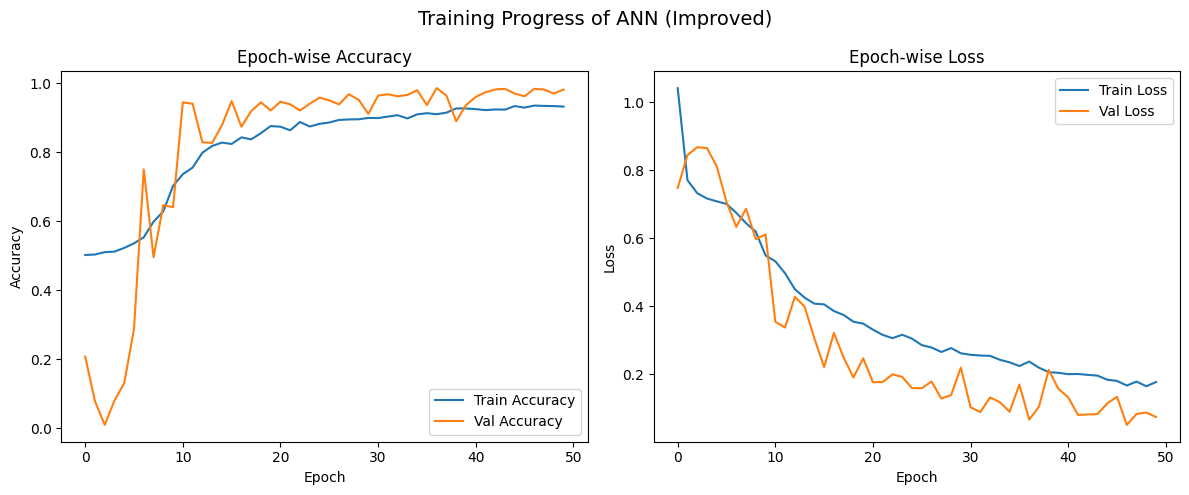

In [58]:
# === Plot epoch-wise training & validation metrics ===
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Epoch-wise Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Epoch-wise Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.suptitle("Training Progress of ANN (Improved)", fontsize=14)
plt.tight_layout()
plt.show()


In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Function to calculate and return evaluation metrics
def get_metrics(name, y_true, y_pred, y_proba):
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, zero_division=0),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred),
        "ROC AUC": roc_auc_score(y_true, y_proba)
    }

# Gather metrics for all models
evaluation_results = [
    get_metrics("XGBoost", y_test, y_pred_xgb, y_proba_xgb),
    get_metrics("SVM", y_test, y_pred_svm, y_proba_svm),
    get_metrics("ANN (Improved)", y_test, y_pred_ann, y_proba_ann)
]

# Display in DataFrame format
evaluation_df = pd.DataFrame(evaluation_results).set_index("Model")
print("\n=== Model Performance Summary ===")
print(evaluation_df.round(4))



=== Model Performance Summary ===
                Accuracy  Precision  Recall  F1 Score  ROC AUC
Model                                                         
XGBoost           0.8454     0.0488  0.1081    0.0672   0.5051
SVM               0.6379     0.0558  0.3784    0.0972   0.5473
ANN (Improved)    0.8426     0.0778  0.1892    0.1102   0.5353


In [60]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1]
}

xgb_model = XGBClassifier(eval_metric='logloss')

# Grid Search
xgb_grid = GridSearchCV(estimator=xgb_model, param_grid=xgb_params, cv=5, scoring='f1', verbose=2, n_jobs=-1)
xgb_grid.fit(X_train_bal, y_train_bal)

print("Best XGBoost Parameters:", xgb_grid.best_params_)
best_xgb = xgb_grid.best_estimator_

# Predict again
y_pred_xgb = best_xgb.predict(X_test)
y_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best XGBoost Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}


In [61]:
# Define parameter grid
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svm_model = SVC(probability=True, random_state=42)

# Grid Search
svm_grid = GridSearchCV(estimator=svm_model, param_grid=svm_params, cv=5, scoring='f1', verbose=2, n_jobs=-1)
svm_grid.fit(X_train_bal, y_train_bal)

print("Best SVM Parameters:", svm_grid.best_params_)
best_svm = svm_grid.best_estimator_

# Predict again
y_pred_svm = best_svm.predict(X_test)
y_proba_svm = best_svm.predict_proba(X_test)[:, 1]


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best SVM Parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}


In [62]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score
)
import pandas as pd

# === Evaluation Function ===
def evaluate_model_metrics(name, y_true, y_pred, y_proba):
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, zero_division=0),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred),
        "ROC AUC": roc_auc_score(y_true, y_proba)
    }

# === Run Evaluation for XGBoost and SVM ===
metrics_summary = [
    evaluate_model_metrics("XGBoost (Tuned)", y_test, y_pred_xgb, y_proba_xgb),
    evaluate_model_metrics("SVM (Tuned)", y_test, y_pred_svm, y_proba_svm)
]

# === Display as Table ===
evaluation_df = pd.DataFrame(metrics_summary).set_index("Model")
print("\n Fine-Tuned Model Evaluation Summary:\n")
print(evaluation_df.round(4))



 Fine-Tuned Model Evaluation Summary:

                 Accuracy  Precision  Recall  F1 Score  ROC AUC
Model                                                          
XGBoost (Tuned)    0.8802     0.0702  0.1081    0.0851   0.5097
SVM (Tuned)        0.8997     0.0270  0.0270    0.0270   0.4224


In [64]:
import shap

# Initialize the TreeExplainer for XGBoost
explainer = shap.Explainer(best_xgb, X_test)

# Calculate SHAP values
shap_values = explainer(X_test)


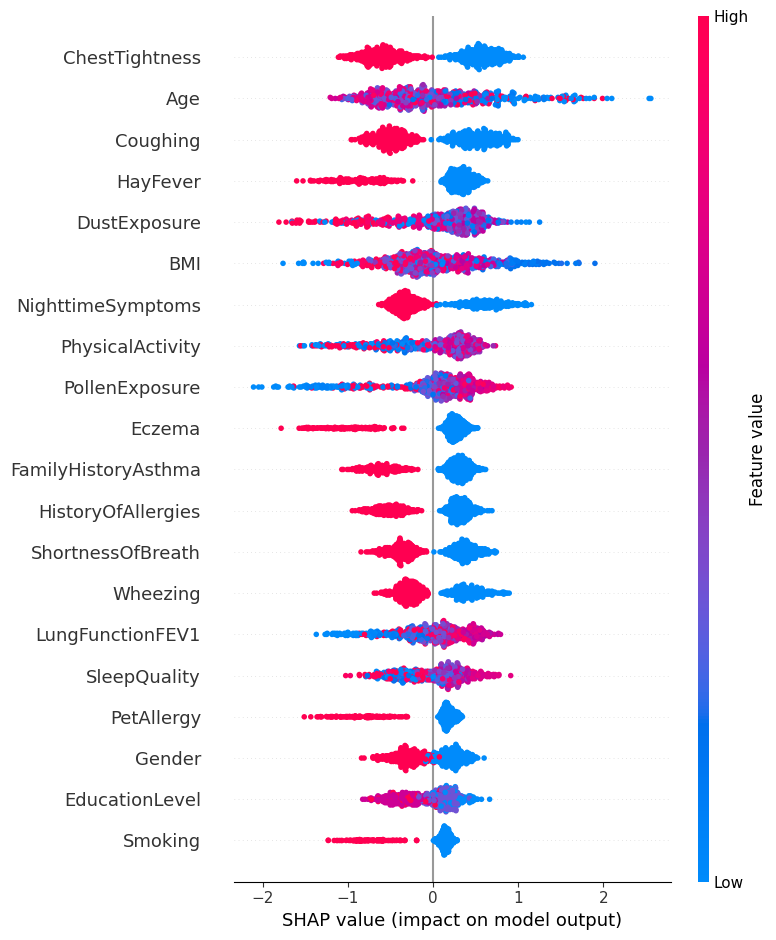

In [65]:
# Summary plot of feature importances
shap.summary_plot(shap_values, X_test)


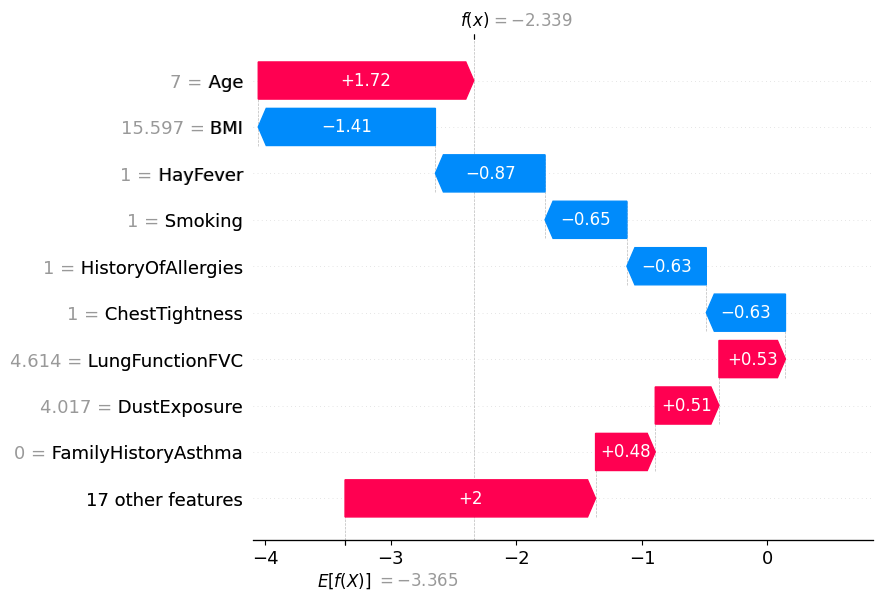

In [66]:
# Explain a single test example (e.g., index 0)
shap.plots.waterfall(shap_values[0])

